# 1. Introduction

### Purpose
Purpose of the notebook is to demonstrate mathematical intuition behind SVM. The intent is to first work out the underlying maths by hand
and then replicate it via python libraries. This will help to crystalise the understanding of anyone
who is using packages to solve these problems.

### Structure
The notebook is structured in 3 different sections:
1. Mathemactical theory
2. Workout example by hand
3. Use sklearn package to replicate

### Who is this post for:
If you want to bridge the gap between the mathematical theory and what is available via open source packages, then this notebook will help you.

If you get confused by what the various attributes of sklearn svm.SVC such as dual_coef_ and coef_, then this post will help you.

### Reference:
* Credits to section 1 - Lecture by Patrick Winston
* Credits to section 2 - MIT Recitation on SVM.

# 2. Mathematical Background 

#### Step 1: Derive decision rule 

We are using geometrical intuition to derive the decision boundary. 

The figure shows the hyperplane separating positive and negative points. 
$\vec{w}$ is the orthonormal vector
$\vec{u}$ is the unknown vector. 

To find if the unknown vector($\vec{u}$), lies on the either side of the hyperplane, find the dot product between $\vec{u}$ and $\vec{w}$. If the distance is greater than a constant, it lies on the positive side of the hyperplane. It is less than constant, it lies on negative side of the hyperplane.

Question - What happens if the projection lies within the hyperplane?
$\vec{w}.\vec{u} >= c$

$\vec{w}.\vec{u} -c >=0$

$\vec{w}.\vec{u} -c >0$ Then positive class else negative class
![hyperplane1.png](https://github.com/annts/support_vector_machines/blob/main/img/1_hyperplane.PNG)

![hyperplane2.png](.\img\1_hyperplane.png)

 
Substituting -c = b,

$\vec{w}.\vec{u} +b >=0 then +1 else -1$
    

$\require {color}$
$\colorbox{yellow} {Decision Rule : $\vec{w}.\vec{u} +b >=0$ then +1 else -1}$

#### Step 2 : Derive width of the hyperplane


![width_hyperplane1.png](https://github.com/annts/support_vector_machines/blob/main/img/2_width_hyperplane.PNG)


![width)hyperplane_2.png](.\img\2_width_hyperplane.PNG)

Using the decision rule and modifying it to introduce the constraint. 

positive sample = $\vec{x_+}$

negative sample = $\vec{x_-}$

We are denoting y for positive classes as +1. y for negative classes as -1. 

for positive class -> $\vec{w}\vec{x_+} + b >=1$ 

for negative class -> $ \vec{w}\vec{x_-} + b <= -1$

Let us introduce a new variable $y_i = +1$ for positive samples. $y_i = -1$ for negative samples.

$y_i(\vec{w}.\vec{x_i} + b) -1 >=0$

For support vectors, $$y_i(\vec{w}\vec{x_i} + b) - 1 =0$$
Substituting for positive classes
$y_+ = 1$

$$\vec{w}\vec{x_+} = 1 - b$$
$$-1(\vec{w}\vec{x_- +b} = 1 $$
$$\vec{w}\vec{x_-} = -1 - b$$


Let us denote 2 points $x_+$ and $x_-$ on the gutters. Straight distance d can be obtained by multiplying $x_+$ and $x_-$ with unit vector. 

w is normal to gutters.

$\frac{\vec{w}}{\lVert w \rVert}$ is the unit vector.

width $d = (x_+ - x_-)\frac{\vec{w}}{\lVert w \rVert}$

$d = \frac{x_+\vec{w} - x_-\vec{w}}{\lVert w \rVert}$

$d = \frac{1 - b + 1 + b}{\lVert w \rVert}$

$d = \frac{2}{\lVert w \rVert}$

$ \require {color}$
$ \colorbox{yellow} {Width of the hyperplane = $\frac{2}{\lVert w \rVert}$} $

**Note : It is very easy to confuse margin width with $\lVert w \rVert$. Key thing to note is $\lVert w \rVert$ is  inversely proportional to margin width. When magnitude of $\vec{w}$ increases, margin width decreases.** 


### Step 3: Formalize objective function

Our objective is to maximize the width of the hyperplane identified in Step 2 -  $\frac{2}{\lVert w \rVert}$ subject to
the constraint identified in Step 1 -  $\vec{w}\vec{x} + b > 0$

Maximise $\frac{2}{\lVert w \rVert}$ such that $\vec{w}\vec{x} + b > 0$ 

Maximising $\frac{2}{\lVert w \rVert}$ is same as minimising ${\lVert w \rVert}^2$

So, the objective function becomes minimise ${\lVert w \rVert}^2$ such that $\vec{w}\vec{x} + b > 0$  

### Step 4: Optimise

A technique from math called [Lagrangian Multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier) is used to solve the above objective.

The method can be summarized as follows: in order to find the maximum or minimum of a function $f(x)$ subjected to the equality constraint $g(x)=0$, form the Lagrangian function

${L}(x,\lambda )=f(x)-\lambda g(x)$

$f(x) = {\frac{1}{2}}{\lVert}w{\rVert}^2 $

$g(x) = y_i(\vec{w}\vec{x_i}+b) -1 = 0$

Using the lagrangian multiplier $\alpha$ leads to defining the **Primal problem** 

$$ L = {\frac{1}{2}}{\lVert}w{\rVert}^2 - \sum \alpha_i{\lbrack}y_i(\vec{w}\vec{x_i}+b) -1{\rbrack}$$

To find extremum of function, calculate derivate w.r.t moving parts and set them to 0
$$ L = {\frac{1}{2}}{\lVert}w{\rVert}^2 - \sum \alpha_i y_i \vec{w}\vec{x_i}+\alpha_i y_i b -\alpha_i$$

$\frac{\partial L}{\partial w} = 0$

$$\frac{\partial {\lVert}w{\rVert}^2}{\partial w} = w $$

$$\frac{\partial {\alpha_i y_i \vec{w}\vec{x_i}}}{\partial w} = \alpha_i y_i \vec{x_i} $$

$$\frac{\alpha_i y_i b}{\partial w} = 0 $$ (No w term, derivative w.r.t constant)

$$\frac{\alpha_i}{\partial w} = 0 $$ (No w term, derivative w.r.t constant)

$$\vec{w} = \sum {\alpha_i} y_i x_i = 0$$

Intuition : $\vec{w}$ is the linear sum of some training samples. For some non support vectors $\alpha_i$ will be zero. Hence, $w_i$ will be 0.

$\frac{\partial L}{\partial b} = 0$
$$\sum \alpha_i y_i = 0 $$

Substituting values back into the primal problem 

#TO DO : Expand the substitution
$$ L = {\frac{1}{2}}{\lVert}w{\rVert}^2 - \sum \alpha_i{\lbrack}y_i(\vec{w}\vec{x_i}+b) -1{\rbrack}$$

$$ L = \sum {\alpha_i} - \frac{1}{2} \sum \sum {\alpha_i}{\alpha_j}{y_i}{y_j}{x_i}{x_j}$$

# 4. Workout Maths
In this example, we will take an example of points that are linearly separable. The centre of the separating
hyperplane passess through  x=2. Width of the separating hyperplane is 2. We will first workout the maths
and then try to cross check our results via computation.

**Derive decision rule. How to calculate w and b in the decision rule?**

***Step 1 : Draw the decision boundary***

y=0 are denoted by blue dots. 
y=1 are denoted by orange crosses

Need to draw the street with maximum width that separates the two. 
A street with width=2 is possible between x=1 and x=3. Middle of the street passes through x=2. 

![sample_data1.png](https://github.com/annts/support_vector_machines/blob/main/img/03_workout_maths_sample_data.png)


![sample_data2.png](.\img\03_workout_maths_sample_data.png)

***Step 2: Write the equation for the boundary $x=2$***
This can be written in the standard line equation $1x-0y-2=0$ . Rewiting it this way will help in factorising weights in step3.

***Step 3: Rewite the above equation in the form $wx + b = 0$***
 $$\begin{bmatrix} ? & ? \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + b = 0$$
 
Extrapolating from the line equation above, we can fill in the dashes

**Equation1**
 $$\begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} - 2 = 0$$
 
Equation 1 has a degree of freedom. It is possible to multiply it by a constant and still satisfy the equation. So, we need to introduce scaling by a constant such that $margin width = \frac{2}{\lVert w \rVert}$. However, that alone won't be sufficient as we need to introduce the constraint that w points to positive class. 

**Equation2**
Scale Equation1 by a constant such that $$margin width =\frac{2}{\lVert w \rVert}$$. 

A more easier way mathematically, is to introduce gutter constraint

for positive classes, $$wx + b >=1 $$ 

for negative classes, $$wx + b <=-1 $$ 

$wx+b=1$  for gutters for positive class
$wx+b=-1$ for gutters for negative class


**Equation 3**
for all support vectors, $$\vec{w}\vec{x} + b = y_i$$
$$y_i = class(i) = +1 or -1$$

To derive the value of w and b, manually, let us substitute one of the support vectors into the equation. Let us consider point D - (3,2).
$$\vec{w}\vec{x_D} + b = -1$$

Substituting for point D, and using values from equation 1, check if the equation above holds good.
$$\begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 3 \\ 2 \end{bmatrix} -2 = -1$$
$$ 3 -2 != 1 $$

So, we have to scale by constant,c
$$c*\begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 3 \\ 2 \end{bmatrix} -c*2 = -1$$
c = -1

$$ weight = \begin{bmatrix} -1 & 0 \end{bmatrix}$$
$$ b = 2 $$

From the diagram, we know that margin width = 2. 

Let us check what $\frac{2}{\lVert w \rVert}$ is : $2/1 = 2$
So, we have sense checked this with equation2.

Let us also check the direction of $\vec{w}$.  $\vec{w}$ points towards -1, 0. It points towards the positive class as shown in the diagram above.

So, far we have calculated $\vec{w}$ and b. This has formalised the maximum margin hyperplane. Next, we would like to calculate supportiveness of the values. 

**Calculating support vector values**

Step 1 : For all non-support vectors, $\alpha=0$.
 For support vectors,i.e - points on the gutters, $\alpha>0$
 
Step 2 : There are 2 equations from introducing lagrange multipier.
$$\sum{\alpha_i}y_i = 0$$
Substituting the value $y_i$ for positive and negative classes, 
$$\sum\limits_{positive classes}{\alpha_p} = \sum\limits_{negative classes}{\alpha_n}$$
Looking at the support vectors in scenario1, we have equation1:
$${\alpha_A} + {\alpha_B} = {\alpha_D}$$

Step 3: $$\vec{w} = \sum{\alpha_i}y_ix_i$$
Looking at the support vectors in scenario1,
$$\vec{w} = {\alpha_A}y_Ax_A + {\alpha_B}y_Bx_B + {\alpha_D}y_Dx_D  $$
Substitue the values of $\vec{w}$, x and y
$$\begin{bmatrix} -1 & 0 \end{bmatrix}= {\alpha_A}\begin{bmatrix} 1 \\ 3 \end{bmatrix} +  {\alpha_B}\begin{bmatrix} 1 \\ 1 \end{bmatrix} - 
{\alpha_D}\begin{bmatrix} 3 \\ 2 \end{bmatrix}$$

Deriving 2 equations from above
$$-1 = \alpha_A + \alpha_B - 3\alpha_D$$
$$0 = 3\alpha_A + \alpha_B - 2\alpha_D$$

Simplifying the 2 equations:

$$-1 = \alpha_A + \alpha_B - 3\alpha_D$$ 
Subsitute equation from step 2, into the equation above.
$$-1 = \alpha_D - 3\alpha_D$$
$$\alpha_D = 1/2$$



$$\alpha_A = 1/4$$
$$\alpha_B = 1/4$$
$$\alpha_D = 1/2$$

# 5. Using Code
### sklearn SVM package

In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [20]:
# Generate random points for positive class with x1 < 1
X1_pos = random.sample(range(-5,1), 5)
X2_pos = random.sample(range(0,5), 5)
X_pos = np.column_stack([X1_pos, X2_pos])
# Add couple of points with x1=1. These are our special support vectors
X_pos = np.vstack([X_pos, [[1,1]], [[1,3]]])

In [21]:
# Generate random points for negative class with x1 > 4
X1_neg = random.sample(range(4, 12), 6)
X2_neg = random.sample(range(0, 7), 6)
X_neg = np.column_stack([X1_neg, X2_neg])
# Add a point with x=3
X_neg = np.vstack([X_neg, [[3,2]]])

In [22]:
# collate data together
X = np.vstack([X_pos, X_neg])
y = np.concatenate((np.repeat(1,7), np.repeat(0,7)))
df = pd.concat([pd.DataFrame(data = X, columns = ['x1', 'x2']),
               pd.Series(y, name ='y')],
              axis=1)

Text(3, 2, 'D')

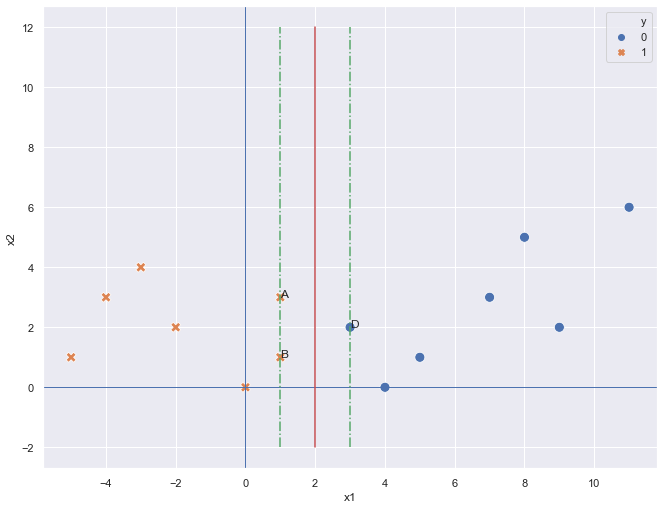

In [23]:
# Plot the data
# Use axes level function in sns to draw the random plot

# Co-ordinates for lines
margin_X = 2 * np.ones(12)
margin_Y = np.linspace(-2, 12, num=12)

gutter1_X = np.ones(12)
gutter1_Y = np.linspace(-2, 12, num=12)

gutter2_X = 3 * np.ones(12)
gutter2_Y = np.linspace(-2, 12, num=12)

# Prepare the plot
fig, ax = plt.subplots(figsize = (11, 8.5))
sns.scatterplot(x='x1', y='x2', hue='y', style='y', data=df, s=100)
ax.axhline(y=0, linewidth=1)
ax.axvline(x=0, linewidth=1)

plt.plot(margin_X, margin_Y, color='r')
plt.plot(gutter1_X, gutter1_Y, 'g-.')
plt.plot(gutter2_X, gutter2_Y, 'g-.')

plt.text(x=1, y=3, s="A")
plt.text(x=1, y=1, s="B")
plt.text(x=3, y=2, s="D")



In [24]:
df

,x1,x2,y
0,-3,4,1
1,-2,2,1
2,0,0,1
3,-5,1,1
4,-4,3,1
5,1,1,1
6,1,3,1
7,11,6,0
8,4,0,0
9,7,3,0


In [25]:
# Fit the model
model = svm.SVC(kernel='linear')
model.fit(X,y)
model.support_vectors_


array([[3., 2.],
       [1., 1.],
       [1., 3.]])

In [26]:
model.support_

array([13,  5,  6])

In [27]:
model.n_support_

array([1, 2])

In [28]:
model.dual_coef_

array([[-0.49984,  0.24992,  0.24992]])

Reconcile the above values with manually calculated $\alpha$ values above

In [29]:
model.coef_

array([[-0.99968,  0.     ]])

Reconcile the above values with the values calculated for $\vec{w}$.

In [30]:
model.intercept_

array([1.99946667])

Reconcile the above with values calculated for b

#### Insights
1. $\vec{w}$ was calculated as $\begin{bmatrix} -1 & 0 \end{bmatrix}$
Values from python program array([[-0.99968,  0.     ]])

2. Value of the intercept derived is 

Value from the python program 

3. Values of support vectors derived are : 
$$\alpha_A = 1/4$$
$$\alpha_B = 1/4$$
$$\alpha_D = 1/2$$

Values from python program, derived via dual_coef_ array([[-0.49984,  0.24992,  0.24992]]), matches, ordering by class of the support vectors probably.

## Additional Questions

Questions to ponder upon:

* 1. What happens if the support vectors move far out horizontally? What will happen to supportiveness of the points? What will happen to weights?
* 2. What happens if support vectors move vertically? What will happen to the supportiveness of points? What will happen to weights?

# Appendix

##### Figure1 : Decision rule

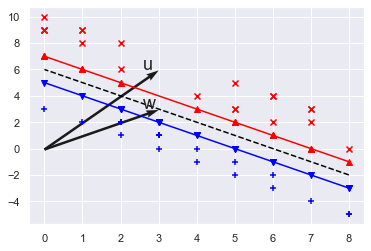

In [31]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random

gutter1_intercept = 5
midpoint_intercept = 6
gutter2_intercept = 7
slope = -1

fig, ax = plt.subplots()

vec_w_x = 3
vec_w_y = 3
vec_u_x = 3
vec_u_y = 6
offset = 0.4

ax.quiver(0, 0, vec_w_x , vec_w_y, angles='xy', scale_units='xy', scale=1)
ax.annotate('w', (vec_w_x - offset,vec_w_y),fontsize=18)
ax.quiver(0, 0, vec_u_x, vec_u_y, angles='xy', scale_units='xy', scale=1)
ax.annotate('u', (vec_u_x-offset ,vec_u_y),fontsize=18)

def ymxb(slope, intercept, x):
    return slope * x + intercept

num_points = 10
x1 = [random.randrange(start=0, stop=9) for i in range(20)]
x2 = [random.randrange(start=0, stop=9) for i in range(20)]
y1 = [ymxb(slope, gutter1_intercept, x) - random.randrange(start=1, stop=3) for x in x1]
y2 = [ymxb(slope, gutter2_intercept, x) + random.randrange(start=1, stop=4) for x in x2]

gutter_y1 = [ymxb(slope, gutter1_intercept, x) for x in x1]
gutter_y2 = [ymxb(slope, gutter2_intercept, x) for x in x2]
midpoint_y1 = [ymxb(slope, midpoint_intercept, x) for x in x1]

plt.scatter(x1, y1, c='blue', marker = '+')
plt.scatter(x2, y2, c='red', marker = 'x')
plt.scatter(x1, gutter_y1, c='blue', marker = 'v')
plt.scatter(x2, gutter_y2, c='red', marker = '^')

plt.plot([max(x1) ,min(x1)],[min(gutter_y1) ,max(gutter_y1) ], c='blue')
plt.plot([max(x1) ,min(x1)],[min(midpoint_y1) ,max(midpoint_y1) ], c='black', linestyle="--")
plt.plot([max(x1), min(x2)],[min(gutter_y2), max(gutter_y2)], c='red')

plt.show()

#### Figure 2 : Width of the hyperplane

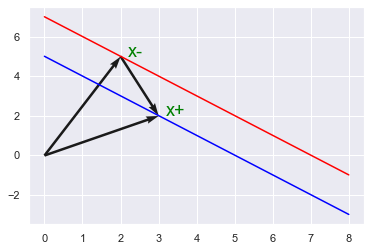

In [36]:
gutter1_intercept = 5
midpoint_intercept = 6
gutter2_intercept = 7
slope = -1

fig, ax = plt.subplots()

vec_w_x = 3
vec_w_y = 2
vec_u_x = 2
vec_u_y = 5
offset = -0.2

ax.quiver(0, 0, vec_w_x , vec_w_y, angles='xy', scale_units='xy', scale=1)
ax.annotate('x+', (vec_w_x - offset,vec_w_y),fontsize=18, color="green")
ax.quiver(0, 0, vec_u_x, vec_u_y, angles='xy', scale_units='xy', scale=1)
ax.annotate('x-', (vec_u_x-offset ,vec_u_y),fontsize=18, color="green")
ax.quiver(vec_u_x, vec_u_y, vec_w_x-vec_u_x, vec_w_y - vec_u_y, scale=1, angles='xy', scale_units='xy', linestyle='--')

def ymxb(slope, intercept, x):
    return slope * x + intercept

num_points = 10
x1 = [random.randrange(start=0, stop=9) for i in range(20)]
x2 = [random.randrange(start=0, stop=9) for i in range(20)]
y1 = [ymxb(slope, gutter1_intercept, x) - random.randrange(start=1, stop=3) for x in x1]
y2 = [ymxb(slope, gutter2_intercept, x) + random.randrange(start=1, stop=4) for x in x2]

gutter_y1 = [ymxb(slope, gutter1_intercept, x) for x in x1]
gutter_y2 = [ymxb(slope, gutter2_intercept, x) for x in x2]

plt.plot([max(x1) ,min(x1)],[min(gutter_y1) ,max(gutter_y1) ], c='blue')
plt.plot([max(x1), min(x2)],[min(gutter_y2), max(gutter_y2)], c='red')
plt.show()